Trong phần này sẽ thay thế bóc tách từ tiếng việt từ underthesea thành Pyvi

In [1]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 17.9 MB/s 
     |████████████████████████████████| 743 kB 60.9 MB/s 


In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_excel('/content/Data2.xlsx')
X= data["question"]
Y= data["answer"]
print("thuoc tinh dieu kien")
print(X)
print("thuoc tinh can du doan")
print(Y)

thuoc tinh dieu kien
0                                            Tạm biệt bot
1                                                 Goodbye
2                                    Tạm biệt mày nhé bot
3                                           Chào tạm biệt
4                                Ngày mai gặp lại nhé bot
                              ...                        
2372    Điểm đầu vào năm 2018 ngành kỹ thuật phần mềm ...
2373    Năm 2018 ngành kỹ thuật phần mềm điểm đầu vào ...
2374        Điểm đầu vào ngành kỹ thuật phần mềm năm 2018
2375    Điểm đầu vào ngành kỹ thuật phần mềm trường đạ...
2376        Điểm đầu vào năm 2018 ngành kỹ thuật phần mềm
Name: question, Length: 2377, dtype: object
thuoc tinh can du doan
0                                                     bye
1                                                     bye
2                                                     bye
3                                                     bye
4                                         

In [8]:
#Tiep theo chung ta se ma hoa Y sao cho no hop ly
le = preprocessing.LabelEncoder()
le.fit(Y)

list_label = list(le.classes_)

print(list_label)
print(len(list_label))

label = le.transform(Y)
print(label)

['Chỉ tiêu xét tuyển ngành công nghệ thông tin: 390', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 120', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 130', 'Chỉ tiêu xét tuyển ngành khoa học máy tính: 120', 'Chỉ tiêu xét tuyển ngành kỹ thuật phần mềm: 250', 'Các hoạt động ngoại khóa: CLB tin học, CLB Tiếng Anh, CLB tình nguyện, CLB văn nghệ,….', 'Các khoa thường xuyên tổ chức các chương trình văn nghệ thường niên các sinh viên giao lưu học hỏi', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.000', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.001', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.002', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.003', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.004', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.00

In [9]:
def tienxuly(document): 
    document = ViTokenizer.tokenize(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [10]:
for i in range(0,X.count()):
  X[i] = tienxuly(X[i])

X

0                                            tạm_biệt bot
1                                                 goodbye
2                                    tạm_biệt mày nhé bot
3                                           chào tạm_biệt
4                                ngày_mai gặp lại nhé bot
                              ...                        
2372    điểm đầu_vào năm 2018 ngành kỹ_thuật phần_mềm ...
2373    năm 2018 ngành kỹ_thuật phần_mềm điểm đầu_vào ...
2374        điểm đầu_vào ngành kỹ_thuật phần_mềm năm 2018
2375    điểm đầu_vào ngành kỹ_thuật phần_mềm trường đạ...
2376        điểm đầu_vào năm 2018 ngành kỹ_thuật phần_mềm
Name: question, Length: 2377, dtype: object

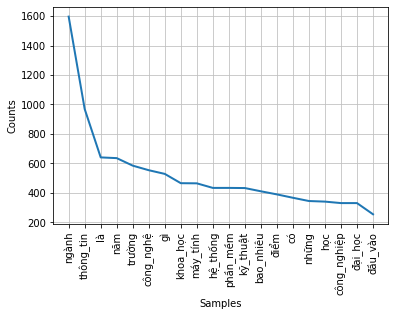

In [11]:
#chung ta se loai bo stop word trong van ban


#bay h dau tien minh muon biet cac stop word o dau va cho nao

#tokens = [t for t in text.split()]
tokens = []

for i in range(0,X.count()):
  for j in X[i].split():
    tokens.append(j)

freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [12]:
#nhu vay chung ta biet mot so tu xuat hien xuat hien thuong xuyen va no se anh huong toi mo hinh can du doan
#chung ta se loai bo chung de cho model co do chinh xac cao hon

stopword = ["nghành","gì","là","trường","năm"]
 
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

print(X[4])
demo = remove_stopwords(X[4])
demo

ngày_mai gặp lại nhé bot


'ngày_mai gặp lại nhé bot'

In [13]:
for i in range(0,X.count()):
  X[i]= remove_stopwords(X[i])

In [14]:
#buoc tiep theo chung ta se xay dung bo tu dien cho may hoc
vectorizer = CountVectorizer()

def transform(data):
  data= list(data)
  return vectorizer.fit_transform(data).todense()

data1 = transform(X)

In [15]:
print(data1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [16]:
#chia du lieu ra lam 2 phan
X_train, X_test, Y_train, Y_test = train_test_split(data1, label, test_size=0.1, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[137 137 119 ...  81  84 123]
[ 62 116 104  88 128 104  96  83 104  56 110   6 144  82 113 138 111 136
 122  52 119  50 111 125  76  50  89 126  53 103 102 140  97 129 103  88
  59 112 130 126  50  89 103 140 103  81  58  83 122 132 124  88 116 126
 120  99  84  69 125 115 101 132  73  82   4  54 116  98  81 116   3 123
  93  83  28  60  92 105 134 142 141  88 138   5 119  26  62 100 127  47
  56 113 136  78 126 138  68 138  15 134 112 125  90 143  87  88 120 140
  78  78 130 125 107  82  56  83 105 104 100  94 104 130   4 133  96  89
  98 113 125  56 120  50 120  94 100 133 137 113  89  49 133  79  94 136
 141 140  90  50  54 140 139 136 119 116  82 112 101  85  55 114  88  95
  81  50 125 135  83  71  54  63 140  95 116  84  66   4   6 109 125 121


In [17]:
X_test.shape

(238, 573)

In [18]:
#khoi tao mo hinh
#chung ta se dung loai mo hinh multinomial Naive Bayes de phan loai

clf= MultinomialNB()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("%0.2f  accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


79.34  accuracy with a standard deviation of 0.02


In [19]:
#dua du lieu vao cho model hoc
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
#kiem tra voi du lieu testing xem do chinh xac cua no la bao nhieu

prediction = clf.predict(X_test)
print("Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: ")
accuracy_score(Y_test, prediction)

Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: 


0.7857142857142857

In [21]:
#bay h se luu file tu vung lai de dung cho sau nay

pickle.dump(vectorizer.vocabulary_, open('vocab.pkl', 'wb')) #luu lai
pickle.dump(clf, open('NB_ChatBot_model.pkl', 'wb')) #luu model lai
#luu cach ma hoa cua nhan lai
pickle.dump(le, open('decode_label.pkl', 'wb'))